In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/SampleSuperstore.csv", encoding='windows-1252')
df.drop(columns=["Row ID","Country","Postal Code"],inplace=True)
df["Order Date"] = pd.to_datetime(df["Order Date"])
df['Quarter'] = df['Order Date'].dt.year.astype(str) + 'Q' + df['Order Date'].dt.quarter.astype(str)
df['Year'] = df['Order Date'].dt.year.astype(str)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Quarter,Year
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016Q4,2016
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016Q4,2016
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016Q2,2016
3,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015Q4,2015
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015Q4,2015


In [4]:
# df.drop_duplicates()
# df.describe()
# df.info()
# df.isna().sum()

In [4]:
segment = df["Segment"].unique()
print("No of Segments = ",len(segment))
print("Segments = ", segment)
region = df["Region"].unique()
print("No of Regions = ",len(region))
print("Region = ", region)
state = df["State"].unique()
print("No of States = ",len(state))
print("States = ", state)
category = df["Category"].unique()
print("No of Categories = ",len(category))
print("Category = ", category)
subcategory = df["Sub-Category"].unique()
print("No of Sub-Catefgories = ",len(subcategory))
print("Sub-Category = ", subcategory)
city = df["City"].unique()
print("No of Cities = ",len(city))
print("City = ", city)

No of Segments =  3
Segments =  ['Consumer' 'Corporate' 'Home Office']
No of Regions =  4
Region =  ['South' 'West' 'Central' 'East']
No of States =  49
States =  ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
No of Categories =  3
Category =  ['Furniture' 'Office Supplies' 'Technology']
No of Sub-Catefgories =  17
Sub-Category =  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'E

<Axes: ylabel='Sales'>

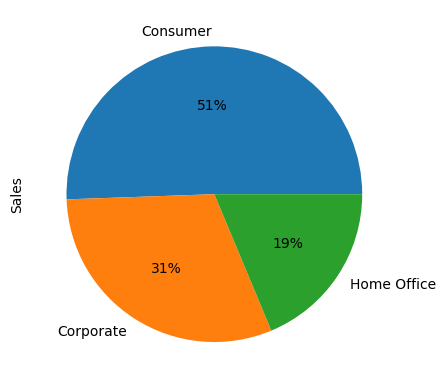

In [6]:
''' GROUPING BY SEGMENTS '''
df.groupby("Segment")["Sales"].sum().plot.pie(autopct="%1.0f%%")

Profit Margin per Segment
Consumer       11.548050
Corporate      13.025506
Home Office    14.034269
dtype: float64


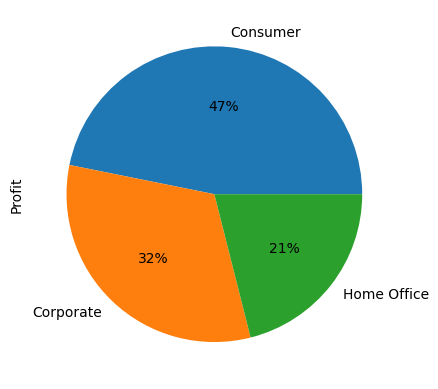

In [44]:
''' GROUPING BY SEGMENTS '''
df.groupby("Segment")["Profit"].sum().plot.pie(autopct="%1.0f%%")
print("Profit Margin per",df.groupby("Segment")["Profit"].sum()*100/df.groupby("Segment")["Sales"].sum())

<Axes: xlabel='Segment', ylabel='Quantity'>

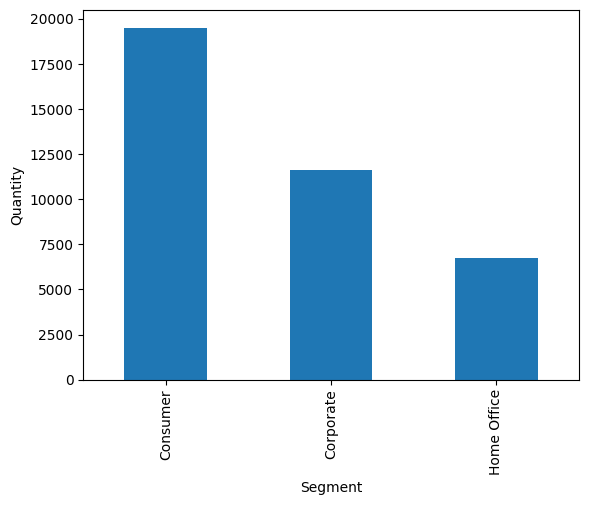

In [16]:
''' GROUPING BY SEGMENTS '''
df.groupby("Segment")["Quantity"].sum().plot.bar(ylabel="Quantity")

Discount per Segment
Consumer       15.814101
Corporate      15.822848
Home Office    14.712844
Name: Discount, dtype: float64


<Axes: xlabel='Segment', ylabel='Discount'>

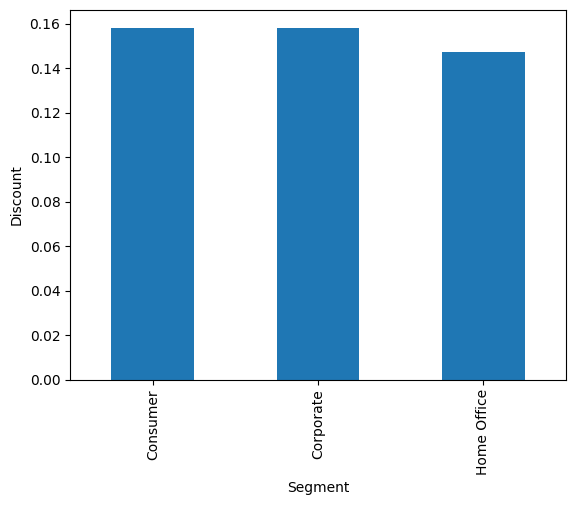

In [15]:
print("Discount per",df.groupby("Segment")["Discount"].mean()*100)
df.groupby("Segment")["Discount"].mean().plot.bar(ylabel="Discount")

<Axes: ylabel='Sales'>

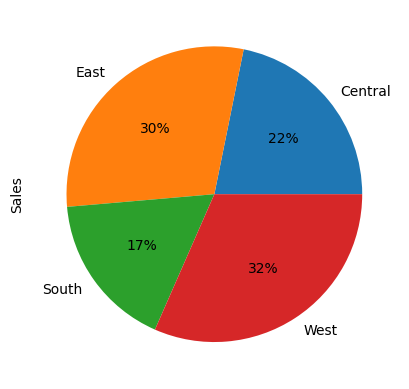

In [123]:
''' GROUPING BY REGIONS '''
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

Profit Margin per Region
Central     7.921629
East       13.483399
South      11.934342
West       14.944831
dtype: float64


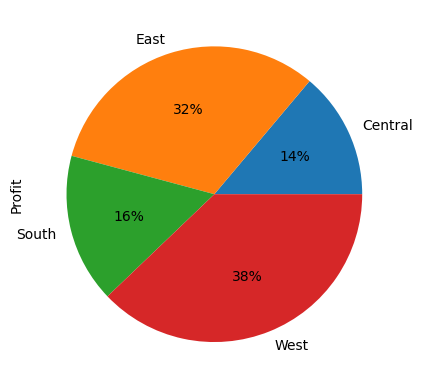

In [21]:
''' GROUPING BY REGIONS '''
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")
print("Profit Margin per",df.groupby("Region")["Profit"].sum()*100/df.groupby("Region")["Sales"].sum())

<Axes: xlabel='Region', ylabel='Quantity'>

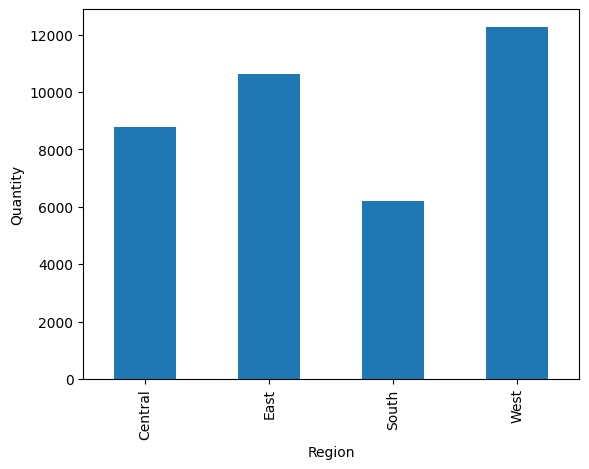

In [20]:
df.groupby("Region")["Quantity"].sum().plot.bar(ylabel="Quantity")

Discounbt per Region
Central    24.035299
East       14.536517
South      14.725309
West       10.933500
Name: Discount, dtype: float64


<Axes: xlabel='Region', ylabel='Discount'>

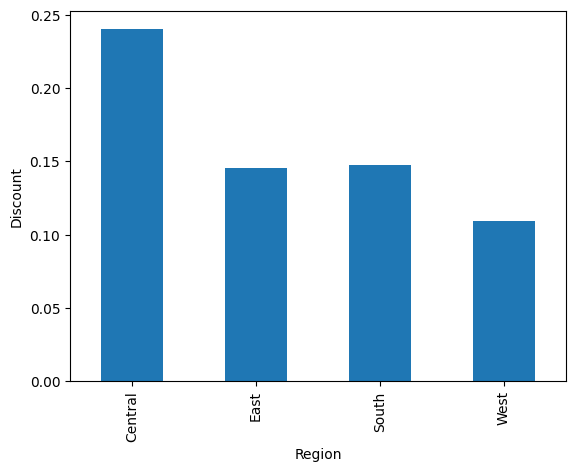

In [17]:
print("Discounbt per",df.groupby("Region")["Discount"].mean()*100)
df.groupby("Region")["Discount"].mean().plot.bar(ylabel="Discount")

<Axes: ylabel='Sales'>

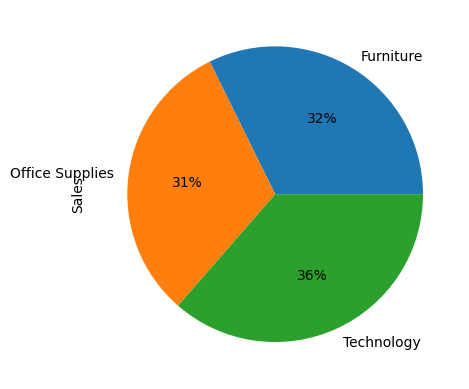

In [125]:
''' GROUPING BY CATEGORIES '''
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

Profit Margin per Category
Furniture           2.486695
Office Supplies    17.035158
Technology         17.395712
dtype: float64


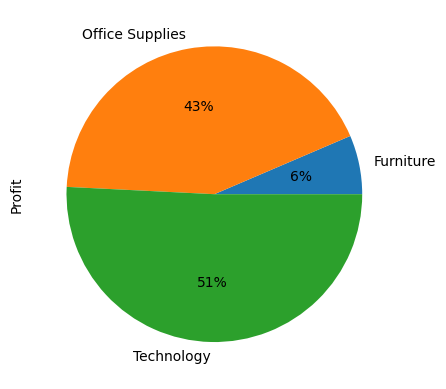

In [5]:
''' GROUPING BY CATEGORIES '''
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")
print("Profit Margin per",df.groupby("Category")["Profit"].sum()*100/df.groupby("Category")["Sales"].sum())

<Axes: xlabel='Category', ylabel='Quantity'>

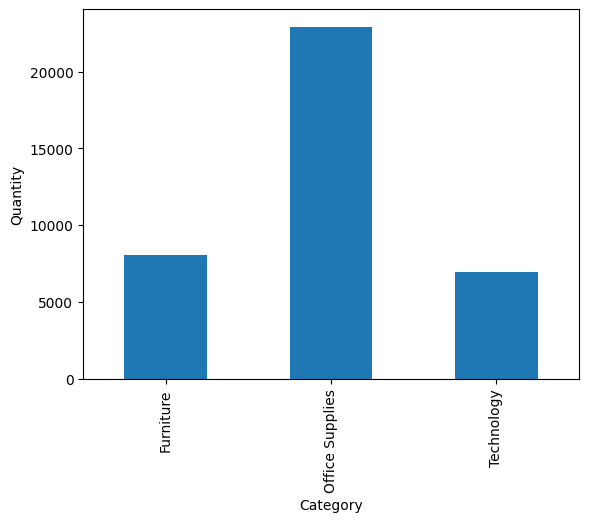

In [19]:
df.groupby("Category")["Quantity"].sum().plot.bar(ylabel="Quantity")

Discount per Category
Furniture          17.392268
Office Supplies    15.728510
Technology         13.232269
Name: Discount, dtype: float64


<Axes: xlabel='Category', ylabel='Discount'>

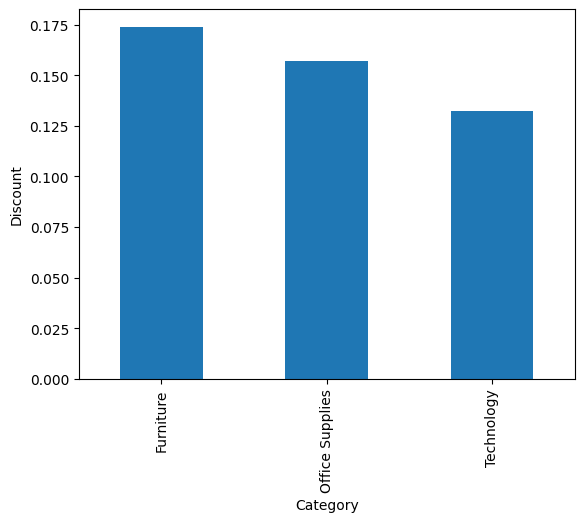

In [22]:
print("Discount per",df.groupby("Category")["Discount"].mean()*100)
df.groupby("Category")["Discount"].mean().plot.bar(ylabel="Discount")

<Axes: xlabel='Sub-Category', ylabel='Sales'>

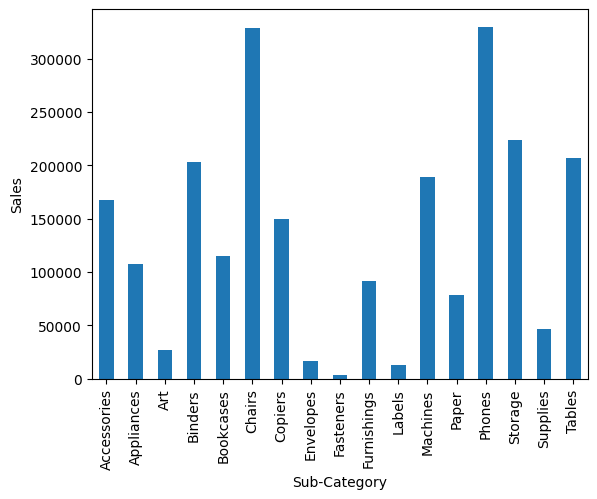

In [23]:
''' GROUPING BY SUB-CATEGORIES '''
df.groupby("Sub-Category")["Sales"].sum().plot.bar(ylabel="Sales")

Profit Margin per Sub-Category
Accessories    25.054700
Appliances     16.867517
Art            24.071083
Binders        14.857361
Bookcases      -3.022768
Chairs          8.095673
Copiers        37.195585
Envelopes      42.267582
Fasteners      31.396504
Furnishings    14.240358
Labels         44.418672
Machines        1.788618
Paper          43.391837
Phones         13.489327
Storage         9.506113
Supplies       -2.547695
Tables         -8.564460
dtype: float64


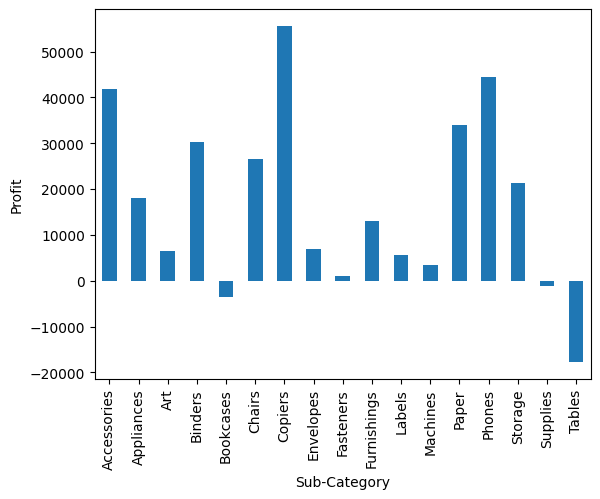

In [27]:
''' GROUPING BY SUB-CATEGORIES '''
df.groupby("Sub-Category")["Profit"].sum().plot.bar(ylabel="Profit")
print("Profit Margin per",df.groupby("Sub-Category")["Profit"].sum()*100/df.groupby("Sub-Category")["Sales"].sum())

<Axes: xlabel='Sub-Category', ylabel='Quantity'>

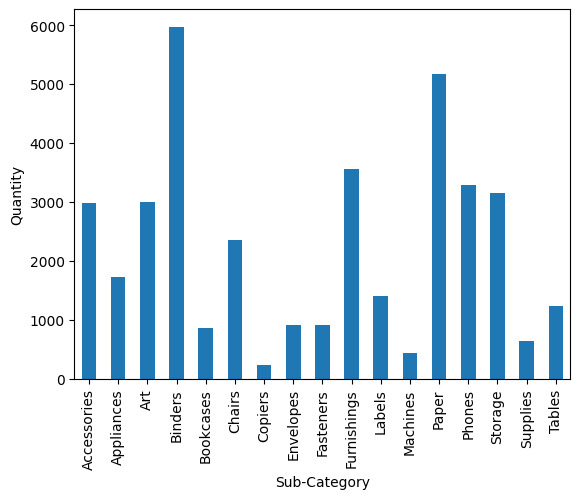

In [25]:
df.groupby("Sub-Category")["Quantity"].sum().plot.bar(ylabel="Quantity")

Discount per Sub-Category
Accessories     7.845161
Appliances     16.652361
Art             7.487437
Binders        37.229153
Bookcases      21.114035
Chairs         17.017828
Copiers        16.176471
Envelopes       8.031496
Fasteners       8.202765
Furnishings    13.834901
Labels          6.868132
Machines       30.608696
Paper           7.489051
Phones         15.455568
Storage         7.470449
Supplies        7.684211
Tables         26.128527
Name: Discount, dtype: float64


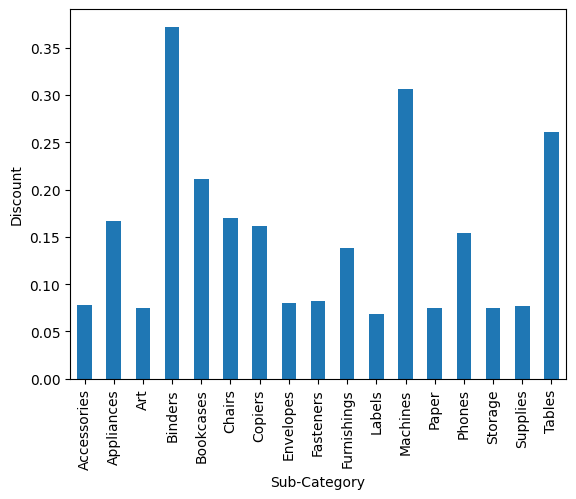

In [26]:
df.groupby("Sub-Category")["Discount"].mean().plot.bar(ylabel="Discount")
print("Discount per",df.groupby("Sub-Category")["Discount"].mean()*100)

<Axes: xlabel='State', ylabel='Sales'>

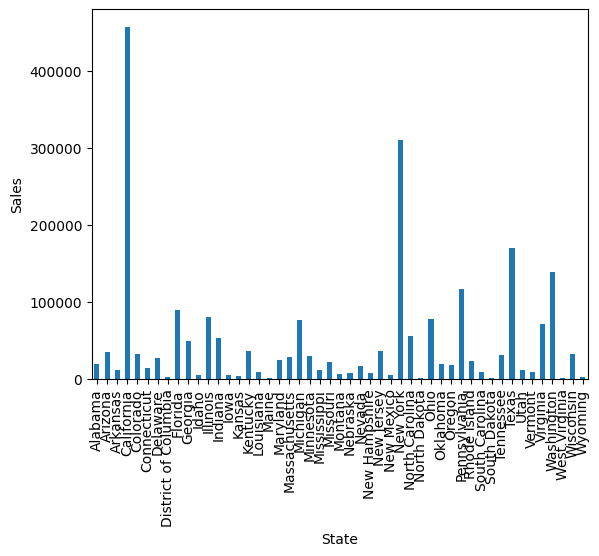

In [28]:
''' GROUPING BY STATES '''
df.groupby("State")["Sales"].sum().plot.bar(ylabel="Sales")

Profit Margin per State
Alabama                 29.659844
Arizona                 -9.715789
Arkansas                34.326447
California              16.688541
Colorado               -20.330864
Connecticut             26.235790
Delaware                36.346034
District of Columbia    36.983662
Florida                 -3.799219
Georgia                 33.098615
Idaho                   18.864250
Illinois               -15.727205
Indiana                 34.325110
Iowa                    25.848776
Kansas                  28.701253
Kentucky                30.607163
Louisiana               23.826572
Maine                   35.771387
Maryland                29.660509
Massachusetts           23.696999
Michigan                32.074618
Minnesota               36.242618
Mississippi             29.457581
Missouri                28.985215
Montana                 32.800377
Nebraska                27.288859
Nevada                  19.826324
New Hampshire           23.400716
New Jersey              

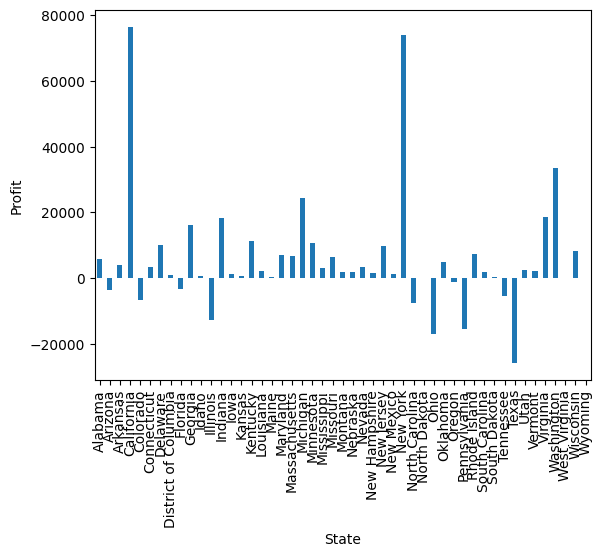

In [30]:
df.groupby("State")["Profit"].sum().plot.bar(ylabel="Profit")
print("Profit Margin per",df.groupby("State")["Profit"].sum()*100/df.groupby("State")["Sales"].sum())

<Axes: xlabel='State', ylabel='Quantity'>

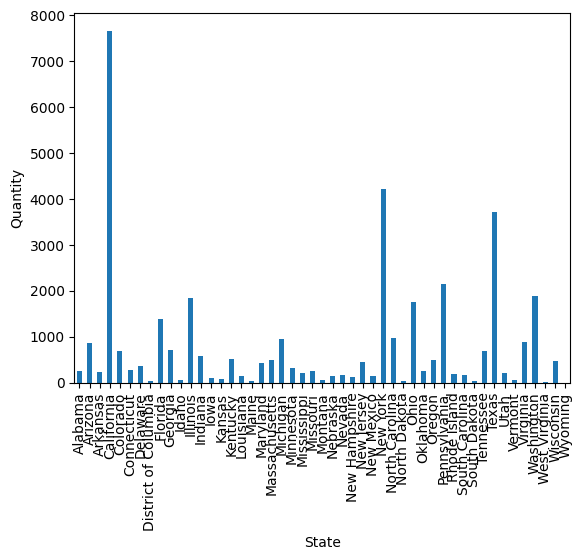

In [31]:
df.groupby("State")["Quantity"].sum().plot.bar(ylabel="Quantity")

Discount per State
Alabama                  0.000000
Arizona                 30.357143
Arkansas                 0.000000
California               7.276362
Colorado                31.648352
Connecticut              0.731707
Delaware                 0.625000
District of Columbia     0.000000
Florida                 29.934726
Georgia                  0.000000
Idaho                    8.571429
Illinois                39.004065
Indiana                  0.000000
Iowa                     0.000000
Kansas                   0.000000
Kentucky                 0.000000
Louisiana                0.000000
Maine                    0.000000
Maryland                 0.571429
Massachusetts            1.555556
Michigan                 0.705882
Minnesota                0.000000
Mississippi              0.000000
Missouri                 0.000000
Montana                  6.666667
Nebraska                 0.000000
Nevada                   6.153846
New Hampshire            1.111111
New Jersey               0.46

<Axes: xlabel='State', ylabel='Discount'>

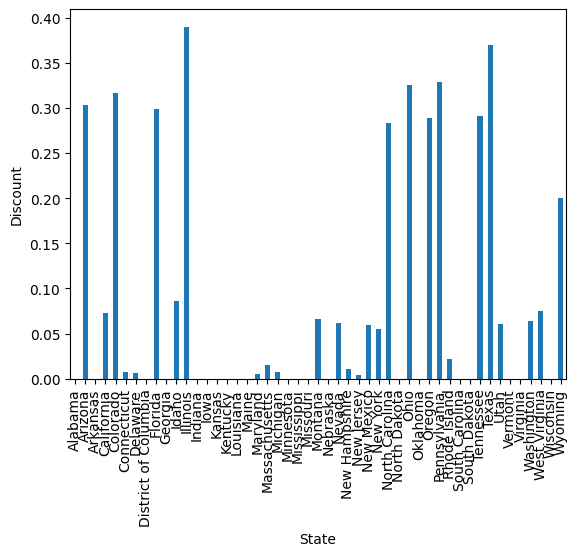

In [32]:
print("Discount per",df.groupby("State")["Discount"].mean()*100)
df.groupby("State")["Discount"].mean().plot.bar(ylabel="Discount")

<Axes: xlabel='Quarter', ylabel='Sales'>

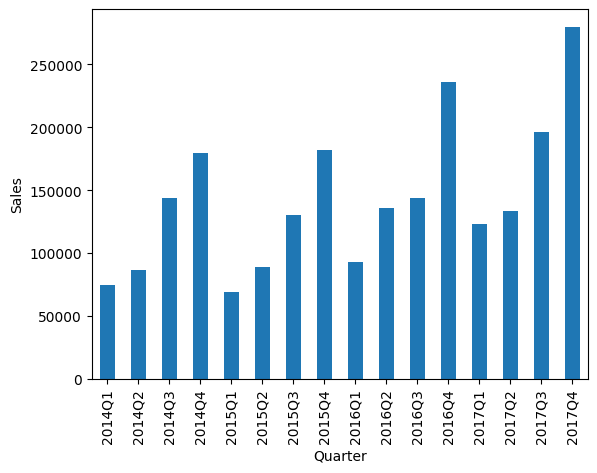

In [33]:
''' GROUPING BY TIME QUARTERS'''
df.groupby("Quarter")["Sales"].sum().plot.bar(ylabel="Sales")

Profit Margin per Quarter
2014Q1     5.119331
2014Q2    12.946880
2014Q3     8.914875
2014Q4    12.093876
2015Q1    13.456366
2015Q2    13.678579
2015Q3    12.938488
2015Q4    12.786343
2016Q1    12.271253
2016Q2    12.044431
2016Q3    11.004865
2016Q4    16.154198
2017Q1    19.088253
2017Q2    11.586948
2017Q3    13.750249
2017Q4     9.801224
dtype: float64


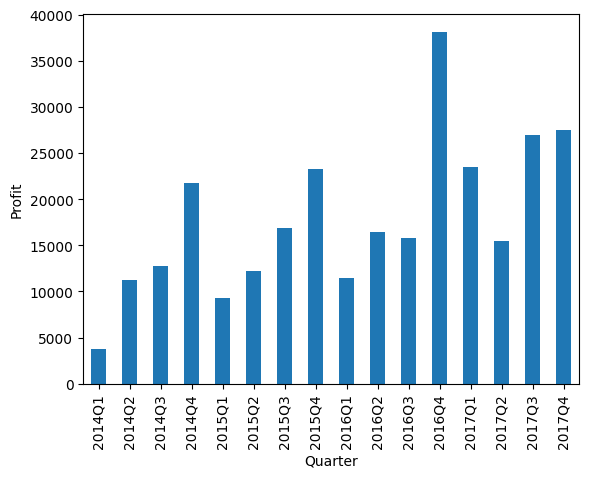

In [35]:
''' GROUPING BY TIME QUARTERS'''
df.groupby("Quarter")["Profit"].sum().plot.bar(ylabel="Profit")
print("Profit Margin per",df.groupby("Quarter")["Profit"].sum()*100/df.groupby("Quarter")["Sales"].sum())

<Axes: xlabel='Quarter', ylabel='Quantity'>

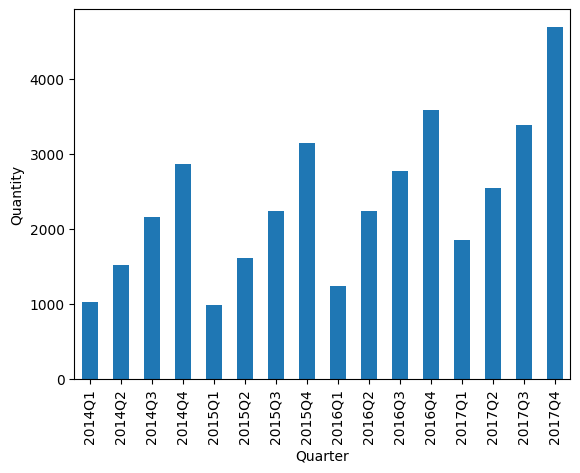

In [36]:
df.groupby("Quarter")["Quantity"].sum().plot.bar(ylabel="Quantity")

Discount per Quarter
2014Q1    15.744681
2014Q2    14.545918
2014Q3    15.508865
2014Q4    16.764238
2015Q1    14.600000
2015Q2    17.162162
2015Q3    15.206081
2015Q4    15.249380
2016Q1    15.200000
2016Q2    16.094276
2016Q3    16.075676
2016Q4    14.688453
2017Q1    15.122000
2017Q2    17.171014
2017Q3    14.462901
2017Q4    15.876128
Name: Discount, dtype: float64


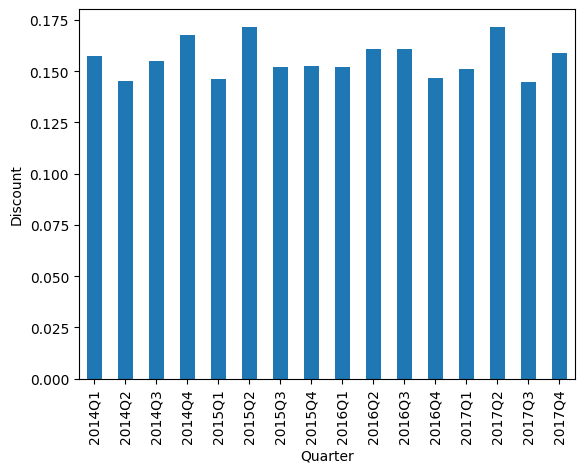

In [34]:
df.groupby("Quarter")["Discount"].mean().plot.bar(ylabel="Discount")
print("Discount per",df.groupby("Quarter")["Discount"].mean()*100)

<Axes: xlabel='Year', ylabel='Sales'>

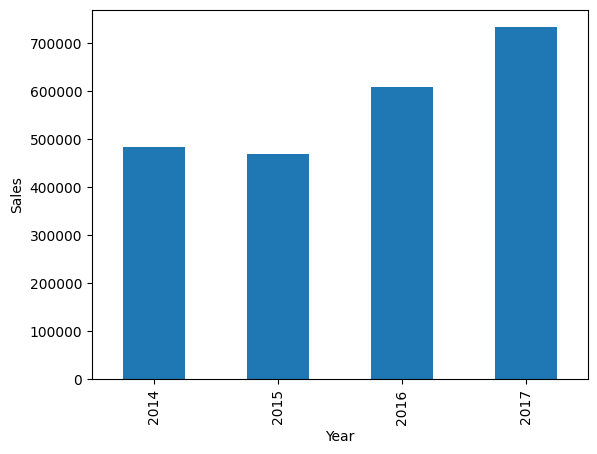

In [37]:
''' GROUPING BY TIME YEARLY '''
df.groupby("Year")["Sales"].sum().plot.bar(ylabel="Sales")

Profit Margin per Year
2014    10.231126
2015    13.095504
2016    13.426530
2017    12.743771
dtype: float64


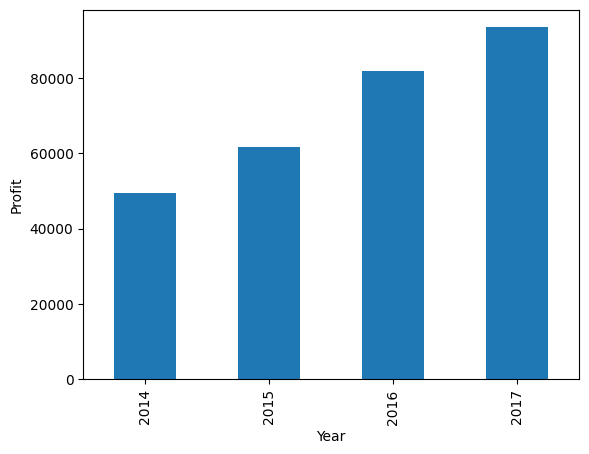

In [39]:
''' GROUPING BY TIME YEARLY '''
df.groupby("Year")["Profit"].sum().plot.bar(ylabel="Profit")
print("Profit Margin per",df.groupby("Year")["Profit"].sum()*100/df.groupby("Year")["Sales"].sum())

<Axes: xlabel='Year', ylabel='Quantity'>

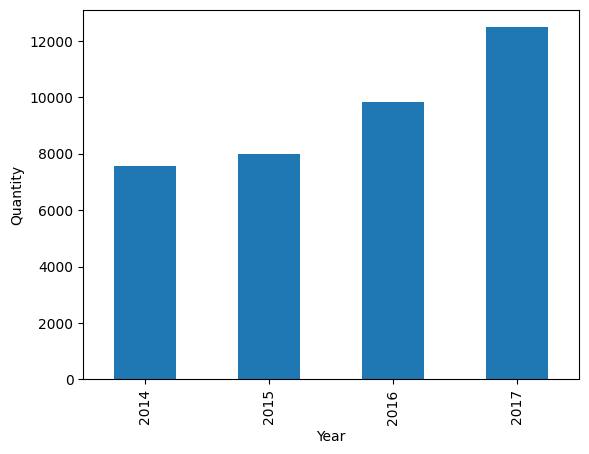

In [38]:
df.groupby("Year")["Quantity"].sum().plot.bar(ylabel="Quantity")

Discount per Year
2014    15.828399
2015    15.560894
2016    15.474295
2017    15.646739
Name: Discount, dtype: float64


<Axes: xlabel='Year', ylabel='Discount'>

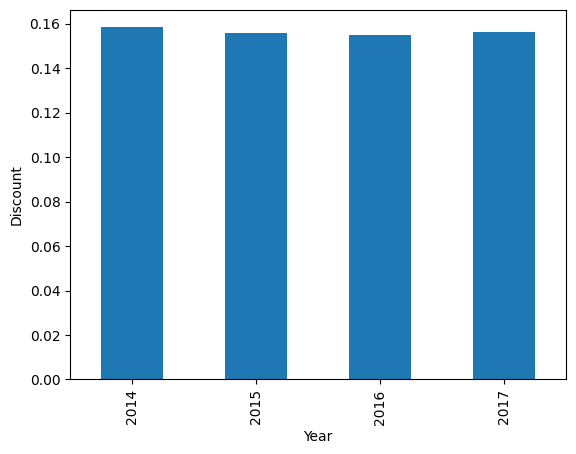

In [41]:
print("Discount per",df.groupby("Year")["Discount"].mean()*100)
df.groupby("Year")["Discount"].mean().plot.bar(ylabel="Discount")

In [42]:
''' ANALYSIS ON WHOLE DATA '''
sales = df["Sales"].sum()
print("Total Sales = $",sales)
profit = df["Profit"].sum()
print("Total Profit = $",profit)
margin = profit*100/sales
print("Profit Margin = ",margin,"%")
disc = df["Discount"].mean()
print("AVG Discount given = ",disc*100)
product = df["Product Name"].unique()
print("No of Products = ",len(product))
# print("Products = ", product)
customer = df["Customer ID"].unique()
print("No of Customers = ",len(customer))
# print("Customers = ", customer)
productsold = df["Quantity"].sum()
print("No of Products sold = ",productsold)
# print("Products = ", product)

Total Sales = $ 2297200.8603000003
Total Profit = $ 286397.0217
Profit Margin =  12.467217240315602 %
AVG Discount given =  15.620272163297976
No of Products =  1850
No of Customers =  793
No of Products sold =  37873
